In [48]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from tensorboard.backend.event_processing import event_accumulator

In [74]:
# 10 second bins
bin_size = 10

In [75]:
params = {
    'legend.fontsize': 'large',
    'figure.figsize': (8, 4), # 2.2*len(csvs)
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large',
    'xtick.major.size': 7.0,
    'ytick.major.size': 3.0
}
pylab.rcParams.update(params)

In [117]:
def plot_dirs(dirs, savepath=''):

    plt.figure()

    for sketch_name, color, directory in dirs:
        time_loss_dict = [[] for i in range(50)]

        for file in os.listdir(directory)[:15]:
            path = os.path.join(directory, file)
            ea = event_accumulator.EventAccumulator(path,
                size_guidance={ # see below regarding this argument
                event_accumulator.COMPRESSED_HISTOGRAMS: 500,
                event_accumulator.IMAGES: 4,
                event_accumulator.AUDIO: 4,
                event_accumulator.SCALARS: 0,
                event_accumulator.HISTOGRAMS: 1,
            })

            ea.Reload()

            times = pd.DataFrame(ea.Scalars('training_time'))['value'].values // bin_size
            losses = pd.DataFrame(ea.Scalars('test_mnll'))['value'].values

            for i in range(len(times)):
    #             print(int(times[i]), losses[i])
                time_loss_dict[int(times[i])].append(losses[i])

    #     print(time_loss_dict)
    #     break

        times = []
        means = []
        stds = []
        for i, entry in enumerate(time_loss_dict):
            if len(entry) > 0:
    #             print(i, len(entry))
                times.append(i*bin_size)
                means.append(np.array(entry).mean())
                stds.append(np.array(entry).std())


    #     print(times)
    #     print(means)
        plt.fill_between(times, np.array(means)-np.array(stds), np.array(means)+np.array(stds), alpha=0.2, color=color)
        plt.plot(times, np.array(means), label=sketch_name, color=color, linewidth=3)

    plt.legend()
#     plt.ylim(0,0.1)
    plt.xlim(0,250)
    plt.xlabel('Training Time [seconds]')
    plt.ylabel('Test MNLL')
    plt.tight_layout()
    
    if len(savepath) > 0:
        plt.savefig(savepath, dpi=300)
    # plt.xscale('log')
    plt.yscale('log')
    plt.show()

In [19]:
dirs_p3_5k = [
    ('TensorSketch', '../tensorboard_logs/d5k/p3/ts'),
    ('TensorSRHT', '../tensorboard_logs/d5k/p3/srht'),
    ('CtR-TensorSRHT', '../tensorboard_logs/d5k/p3/srht_comp_real')
]

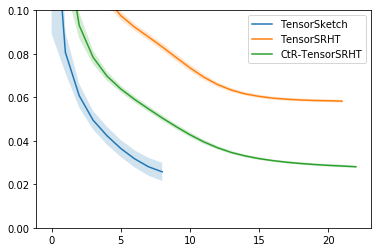

In [20]:
plot_dirs(dirs_p3_5k)

In [21]:
dirs_p3_10k = [
    ('TensorSketch', '../tensorboard_logs/d10k/p3/ts'),
    ('TensorSRHT', '../tensorboard_logs/d10k/p3/srht'),
    ('CtR-TensorSRHT', '../tensorboard_logs/d10k/p3/srht_comp_real')
]

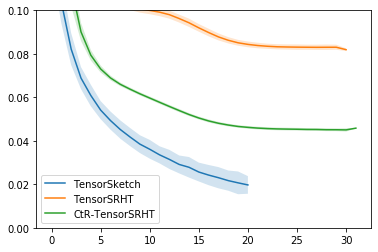

In [22]:
plot_dirs(dirs_p3_10k)

In [36]:
dirs_p6_10k = [
    ('TensorSketch', '../tensorboard_logs/mnist/d10k/p6/ts'),
    ('TensorSRHT', '../tensorboard_logs/mnist/d10k/p6/srht'),
    ('CtR-TensorSRHT', '../tensorboard_logs/mnist/d10k/p6/srht_comp_real')
]

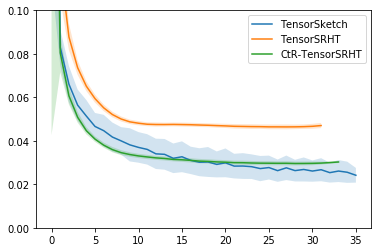

In [37]:
plot_dirs(dirs_p6_10k)

In [28]:
dirs_p6_10k = [
    ('TensorSketch', '../tensorboard_logs/fashion_mnist/d10k/p6/ts'),
    ('TensorSRHT', '../tensorboard_logs/fashion_mnist/d10k/p6/srht'),
    ('CtR-TensorSRHT', '../tensorboard_logs/fashion_mnist/d10k/p6/srht_comp_real')
]

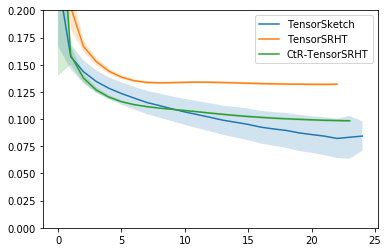

In [29]:
plot_dirs(dirs_p6_10k)

In [81]:
colors = plt.get_cmap('tab20c')(np.linspace(0, 0.8, 16))[::2]
colors = np.flip(colors, axis=0)

In [99]:
dirs_p6_10k_tune = [
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist_tune/d10k/ts'),
    ('TensorSRHT', colors[6], '../tensorboard_logs/mnist_tune/d10k/srht'),
    ('CtR-TensorSRHT', colors[7], '../tensorboard_logs/mnist_tune/d10k/srht_comp_real')
]

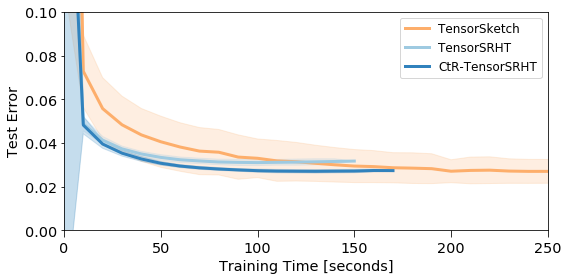

In [100]:
plot_dirs(dirs_p6_10k_tune, savepath='../figures/vi_gp_convergence.pdf')

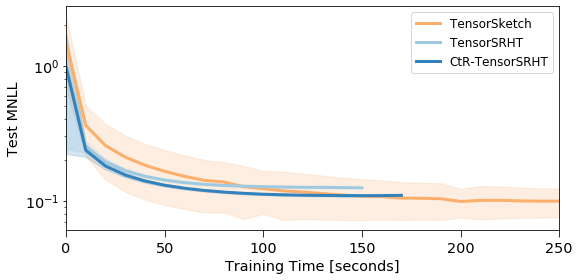

In [118]:
plot_dirs(dirs_p6_10k_tune, savepath='../figures/vi_gp_convergence_train.pdf')

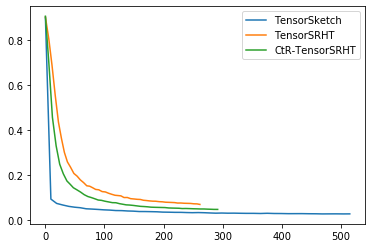

In [12]:
plt.figure()

for file in files:
    ea = event_accumulator.EventAccumulator(file[1],
        size_guidance={ # see below regarding this argument
        event_accumulator.COMPRESSED_HISTOGRAMS: 500,
        event_accumulator.IMAGES: 4,
        event_accumulator.AUDIO: 4,
        event_accumulator.SCALARS: 0,
        event_accumulator.HISTOGRAMS: 1,
    })
    
    ea.Reload()
    
    times = pd.DataFrame(ea.Scalars('training_time'))['value'].values
    losses = pd.DataFrame(ea.Scalars('test_error'))['value'].values
    
    plt.plot(times, losses, label=file[0])

plt.legend()
# plt.yscale('log')
plt.show()

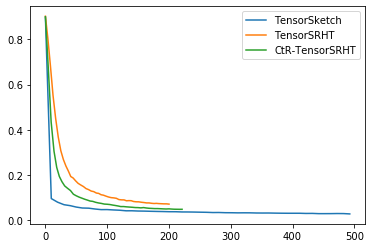

In [22]:
plt.figure()

for file in files:
    ea = event_accumulator.EventAccumulator(file[1],
        size_guidance={ # see below regarding this argument
        event_accumulator.COMPRESSED_HISTOGRAMS: 500,
        event_accumulator.IMAGES: 4,
        event_accumulator.AUDIO: 4,
        event_accumulator.SCALARS: 0,
        event_accumulator.HISTOGRAMS: 1,
    })
    
    ea.Reload()
    
    times = pd.DataFrame(ea.Scalars('training_time'))['value'].values
    losses = pd.DataFrame(ea.Scalars('test_error'))['value'].values
    
    plt.plot(times, losses, label=file[0])

plt.legend()
# plt.yscale('log')
plt.show()

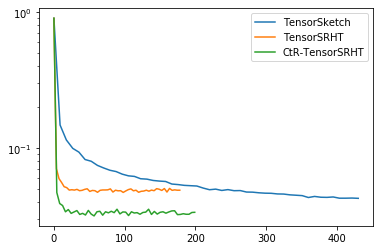

In [7]:
plt.figure()

for file in files:
    ea = event_accumulator.EventAccumulator(file[1],
        size_guidance={ # see below regarding this argument
        event_accumulator.COMPRESSED_HISTOGRAMS: 500,
        event_accumulator.IMAGES: 4,
        event_accumulator.AUDIO: 4,
        event_accumulator.SCALARS: 0,
        event_accumulator.HISTOGRAMS: 1,
    })
    
    ea.Reload()
    
    times = pd.DataFrame(ea.Scalars('training_time'))['value'].values
    losses = pd.DataFrame(ea.Scalars('test_error'))['value'].values
    
    plt.plot(times, losses, label=file[0])

plt.legend()
plt.yscale('log')
plt.show()

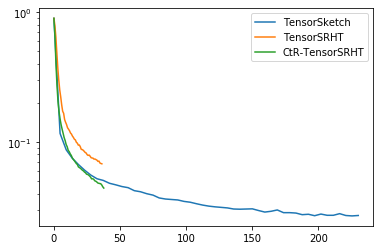

In [11]:
plt.figure()

for file in files:
    ea = event_accumulator.EventAccumulator(file[1],
        size_guidance={ # see below regarding this argument
        event_accumulator.COMPRESSED_HISTOGRAMS: 500,
        event_accumulator.IMAGES: 4,
        event_accumulator.AUDIO: 4,
        event_accumulator.SCALARS: 0,
        event_accumulator.HISTOGRAMS: 1,
    })
    
    ea.Reload()
    
    times = pd.DataFrame(ea.Scalars('training_time'))['value'].values
    losses = pd.DataFrame(ea.Scalars('test_error'))['value'].values
    
    plt.plot(times, losses, label=file[0])

plt.legend()
plt.yscale('log')
plt.show()

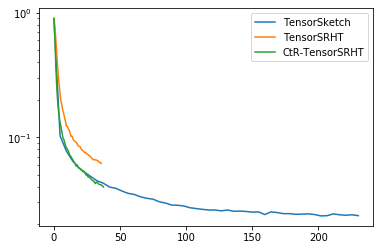

In [16]:
plt.figure()

for file in files:
    ea = event_accumulator.EventAccumulator(file[1],
        size_guidance={ # see below regarding this argument
        event_accumulator.COMPRESSED_HISTOGRAMS: 500,
        event_accumulator.IMAGES: 4,
        event_accumulator.AUDIO: 4,
        event_accumulator.SCALARS: 0,
        event_accumulator.HISTOGRAMS: 1,
    })
    
    ea.Reload()
    
    times = pd.DataFrame(ea.Scalars('training_time'))['value'].values
    losses = pd.DataFrame(ea.Scalars('test_error'))['value'].values
    
    plt.plot(times, losses, label=file[0])

plt.legend()
plt.yscale('log')
plt.show()

0.05869999900460243
0.04820000007748604
0.031300000846385956


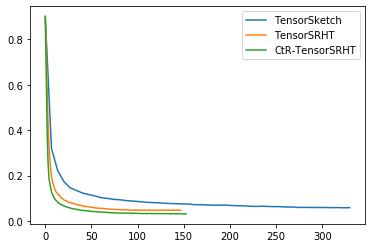

In [9]:
plt.figure()

for file in files:
    ea = event_accumulator.EventAccumulator(file[1],
        size_guidance={ # see below regarding this argument
        event_accumulator.COMPRESSED_HISTOGRAMS: 500,
        event_accumulator.IMAGES: 4,
        event_accumulator.AUDIO: 4,
        event_accumulator.SCALARS: 0,
        event_accumulator.HISTOGRAMS: 1,
    })
    
    ea.Reload()
    
    times = pd.DataFrame(ea.Scalars('training_time'))['value'].values
    losses = pd.DataFrame(ea.Scalars('test_error'))['value'].values
    print(losses[-1])
    
    plt.plot(times, losses, label=file[0])

plt.legend()
# plt.yscale('log')
plt.show()

0.02250000089406967
0.048500001430511475
0.029500000178813934


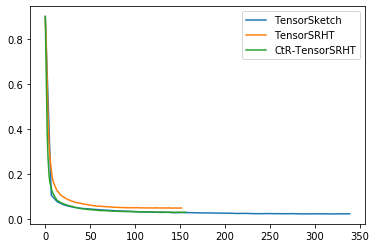

In [12]:
plt.figure()

for file in files:
    ea = event_accumulator.EventAccumulator(file[1],
        size_guidance={ # see below regarding this argument
        event_accumulator.COMPRESSED_HISTOGRAMS: 500,
        event_accumulator.IMAGES: 4,
        event_accumulator.AUDIO: 4,
        event_accumulator.SCALARS: 0,
        event_accumulator.HISTOGRAMS: 1,
    })
    
    ea.Reload()
    
    times = pd.DataFrame(ea.Scalars('training_time'))['value'].values
    losses = pd.DataFrame(ea.Scalars('test_error'))['value'].values
    print(losses[-1])
    
    plt.plot(times, losses, label=file[0])

plt.legend()
# plt.yscale('log')
plt.show()

In [12]:
# somehow convergence of tensorsrht is much slower! might be related to optimizer and learning rate...
# does learning rate depend on the sketch?

In [7]:
ea.Tags()

{'images': [],
 'audio': [],
 'histograms': ['q_mean'],
 'scalars': ['test_loss',
  'test_mnll',
  'test_kl',
  'test_error',
  'training_time',
  'train_loss',
  'train_mnll',
  'train_kl',
  'train_error',
  'feature_scale',
  'learning_rate',
  'kl_weight'],
 'distributions': ['q_mean'],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [14]:
ea.Scalars('test_error')

[ScalarEvent(wall_time=1643021475.7965705, step=0, value=0.9043999910354614),
 ScalarEvent(wall_time=1643021482.271253, step=1, value=0.6998999714851379),
 ScalarEvent(wall_time=1643021489.1895025, step=2, value=0.45559999346733093),
 ScalarEvent(wall_time=1643021496.2758996, step=3, value=0.3294999897480011),
 ScalarEvent(wall_time=1643021503.1217313, step=4, value=0.24770000576972961),
 ScalarEvent(wall_time=1643021509.9689975, step=5, value=0.2054000049829483),
 ScalarEvent(wall_time=1643021516.8257995, step=6, value=0.17350000143051147),
 ScalarEvent(wall_time=1643021522.9851587, step=7, value=0.1589999943971634),
 ScalarEvent(wall_time=1643021529.222074, step=8, value=0.14339999854564667),
 ScalarEvent(wall_time=1643021535.76152, step=9, value=0.13449999690055847),
 ScalarEvent(wall_time=1643021542.841001, step=10, value=0.12439999729394913),
 ScalarEvent(wall_time=1643021549.8856792, step=11, value=0.11270000040531158),
 ScalarEvent(wall_time=1643021556.8507063, step=12, value=0.